## The Bike Share Dataset contains data on the amount of bike rental and the weather and season information on a day.

## By analysing the data we can gain some unexpected insights

## Loading data and initial examination

In [1]:
import pandas as pd
bike_share = pd.read_csv("data/day.csv", delimiter=",")
bike_share

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [2]:
bike_share.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [3]:
bike_share.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
bike_share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
bike_share["windspeed"].max()

0.507463

## Exploratory Analysis of the data

<AxesSubplot:>

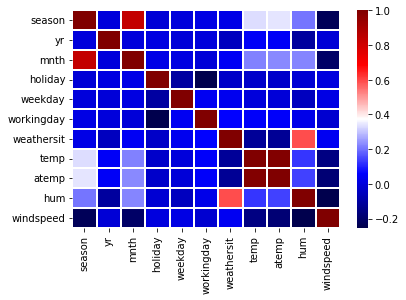

In [7]:
import seaborn as sns

relevant_cols = bike_share[["season","yr","mnth","holiday","weekday","workingday","weathersit","temp","atemp","hum","windspeed"]]
sns.heatmap(relevant_cols.corr(),cmap="seismic",linewidths=0.4)

#### Only correlations are the obvious ones: month and season, temperature and feeling temperature, humidity and weather situation

### Question: Are there specific days when the use of the bikes were exceptionally high?

In [8]:
# convert dates from objects to pandas datetime
bike_share["dteday"]=pd.to_datetime(bike_share["dteday"])

<AxesSubplot:xlabel='dteday', ylabel='cnt'>

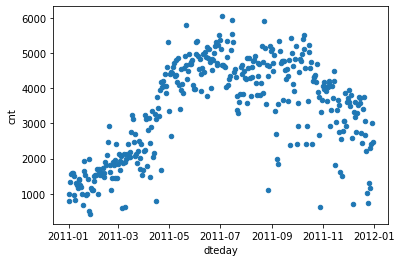

In [9]:
import matplotlib.pyplot as plt

# get overview of amount of rentals in 2011
data_2011=bike_share[bike_share["yr"]==0]
data_2011.plot(x="dteday",y="cnt",kind="scatter")



#### In 2011 the maximum amount of bike rentals in a day is slightly over 6000. Only on a few days there have been over 5500 bikes rented on one day. Below there are the data rows of the most popular days sorted by the total of bikes rented on the given day

In [10]:
highest_rentals_2011=bike_share[(bike_share["yr"]==0) & (bike_share["cnt"]>5500)]
highest_rentals_2011.sort_values(by=["cnt"],ascending=False)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
184,185,2011-07-04,3,0,7,1,1,0,2,0.726667,0.665417,0.637917,0.081479,3065,2978,6043
196,197,2011-07-16,3,0,7,0,6,0,1,0.686667,0.638263,0.585000,0.208342,2418,3505,5923
234,235,2011-08-23,3,0,8,0,2,1,1,0.640833,0.606067,0.455417,0.146763,1281,4614,5895
140,141,2011-05-21,2,0,5,0,6,0,1,0.602500,0.571975,0.626667,0.120650,2258,3547,5805
195,196,2011-07-15,3,0,7,0,5,1,1,0.663333,0.624371,0.591250,0.182833,1318,4220,5538
180,181,2011-06-30,3,0,6,0,4,1,1,0.696667,0.637008,0.434167,0.185312,1027,4488,5515
281,282,2011-10-09,4,0,10,0,0,0,1,0.540833,0.523983,0.727500,0.063450,2397,3114,5511


In [11]:
data_2011["cnt"].mean()

3405.7616438356163

#### In 2011, on the most popular day there were almost 2x as many bike rentals than the average of that year

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714
637,638,2012-09-29,4,1,9,0,6,0,1,0.542500,0.530296,0.542917,0.227604,2589,5966,8555
630,631,2012-09-22,3,1,9,0,6,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
447,448,2012-03-23,2,1,3,0,5,1,2,0.601667,0.570067,0.694167,0.116300,2469,5893,8362
504,505,2012-05-19,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
617,618,2012-09-09,3,1,9,0,0,0,1,0.610000,0.578925,0.547500,0.224496,2570,5657,8227


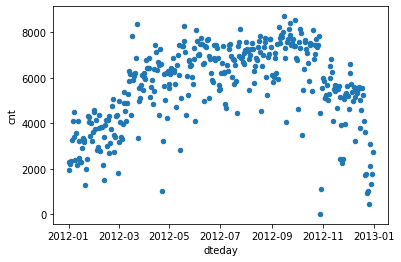

In [12]:
# get overview of amount of rentals in 2012
data_2012=bike_share[bike_share["yr"]==1]
data_2012.plot(x="dteday",y="cnt",kind="scatter")
highest_rentals_2012=bike_share[(bike_share["yr"]==1) & (bike_share["cnt"]>8200)]
highest_rentals_2012.sort_values(by=["cnt"],ascending=False)


In [13]:
data_2012["cnt"].mean()

5599.934426229508

#### We can see very similar results for 2012. There were a few days with the highest count of bike rentals. The most popular day saw almost double the average of bike rentals for that year. 

### Conclusion: Yes, there are a handful (between 6-7) of days a year when the amount of bikes rented are higher than the rest of the year

### Question 2: What else is happening on those popular days? What is the difference between a popular day and an average day? What about the least popular day?

In [14]:

popular_days = pd.concat([highest_rentals_2012,highest_rentals_2011])


6    6
5    2
0    2
4    1
1    1
2    1
Name: weekday, dtype: int64

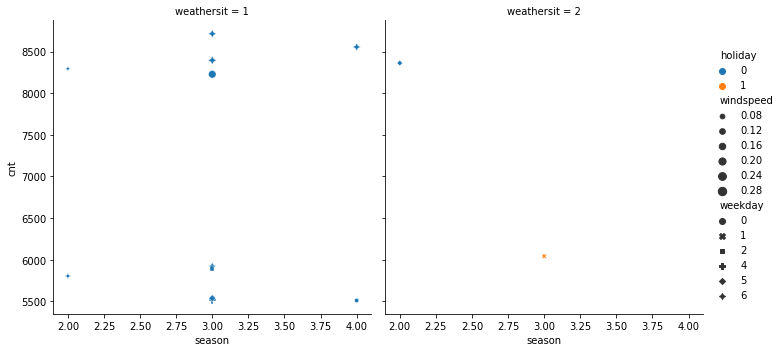

In [15]:
sns.relplot(
    data=popular_days,
    x="season", y="cnt", col="weathersit",
    hue="holiday", style="weekday", size="windspeed",
)
popular_days["weekday"].value_counts()

#### We can see that the weather is always clear of precipitation, it's never winter and the windspeed only gets to about half the recorded maximum. 
#### It's very often a saturday and it might be holiday.



In [16]:
avg_cnt=bike_share["cnt"].mean()
avg_rentals=bike_share[(bike_share["cnt"]>avg_cnt-50) & (bike_share["cnt"]<avg_cnt+50)]


6    5
0    4
2    4
1    4
3    1
Name: weekday, dtype: int64

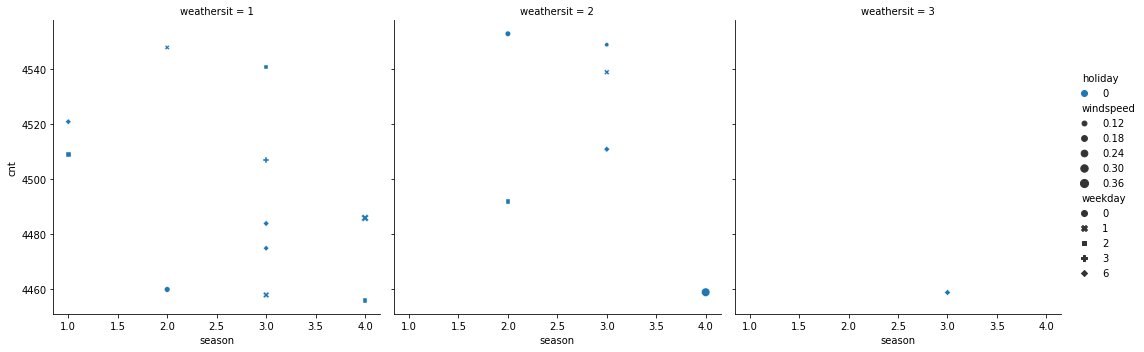

In [17]:
sns.relplot(
    data=avg_rentals,
    x="season", y="cnt", col="weathersit",
    hue="holiday", style="weekday", size="windspeed",
)
avg_rentals["weekday"].value_counts()

#### On a day where an average amount of bike are rented the weather is also mostly clear but it can also be raining and it can be winter.  The windspeed can also be higher than on a very popular day.
#### It is very likely to be Saturday, but it is almost as likely to be Sunday, Monday or Tuesday. But it is never Thursday or Friday. It is also never a holiday.  



### Question 3: How many days of clear skies were there in Washington in the summer of 2011 and 2012?

In [18]:
total_summer_days_2011 = bike_share[(bike_share["season"]==3)& (bike_share["yr"]==0)]
clear_skies_2011 = bike_share[(bike_share["season"]==3)& (bike_share["yr"]==0) & (bike_share["weathersit"]==1)]

total_summer_days_2012 = bike_share[(bike_share["season"]==3)& (bike_share["yr"]==1)]
clear_skies_2012 = bike_share[(bike_share["season"]==3)& (bike_share["yr"]==1) & (bike_share["weathersit"]==1)]

print("2011")
print(total_summer_days_2011.shape)
print(clear_skies_2011.shape)
print("2012")
print(total_summer_days_2012.shape)
print(clear_skies_2012.shape)

2011
(94, 16)
(66, 16)
2012
(94, 16)
(70, 16)


### Question 4: How many days of clear skies were there in total in those years?

In [19]:
clear_skies_2011 = bike_share[(bike_share["yr"]==0) & (bike_share["weathersit"]==1)]

clear_skies_2012 = bike_share[(bike_share["yr"]==1) & (bike_share["weathersit"]==1)]

print("2011")
print(clear_skies_2011.shape)
print("2012")
print(clear_skies_2012.shape)

2011
(226, 16)
2012
(237, 16)


#### We can see that Washington is a city that sees a lot of sun. About 75% of summer is filled with clear skies and about 63% of the year has clear skies.

In [23]:
data = pd.read_csv("data/day.csv", delimiter=",")



## Extracting entries where atemp and temp are significantly different and seeing what may have caused it
- every entry except 1 is in summer (season=3)
- higher humidity played a role
- windspeed played no significant role

High differences between atemp and temp didn't affect amount of rentals

,instant,temp,atemp,hum,windspeed,season,weathersit,cnt
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,378.307692,0.752993,0.642959,0.559518,0.171833,3.076923,1.230769,5129.384615
std,172.141601,0.064949,0.137501,0.184607,0.039097,0.277350,0.599145,1691.660158
min,208.000000,0.609167,0.242400,0.402917,0.078367,3.000000,1.000000,1842.000000
25%,214.000000,0.731667,0.652792,0.450833,0.161071,3.000000,1.000000,4475.000000
50%,266.000000,0.775000,0.690667,0.491250,0.179721,3.000000,1.000000,4845.000000
75%,549.000000,0.783333,0.707071,0.570833,0.195267,3.000000,1.000000,6227.000000
max,595.000000,0.828333,0.752533,0.972500,0.231354,4.000000,3.000000,7458.000000


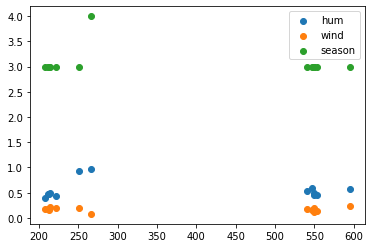

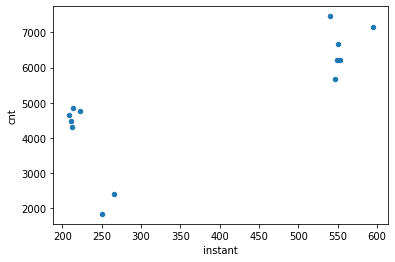

In [24]:
outliers=data[abs(data["temp"]-data["atemp"]) > 0.075]
outliers=outliers[["instant", "temp", "atemp", "hum", "windspeed", "season", "weathersit", "cnt"]]
#plt.scatter(x=outliers["instant"], y=outliers["temp"], label="temp")
#plt.scatter(x=outliers["instant"], y=outliers["atemp"], label="atemp")
plt.scatter(x=outliers["instant"], y=outliers["hum"], label="hum")
plt.scatter(x=outliers["instant"], y=outliers["windspeed"], label="wind")
plt.scatter(x=outliers["instant"], y=outliers["season"], label="season")
plt.legend(loc="upper right")

outliers.plot(x="instant", y="cnt", kind="scatter") # show amount of rentals

outliers.describe()

## How much was the difference between registered and casual rentals on the day with peak number of rentals each month?

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,diff
24,25,2011-01-25,1,0,1,0,2,1,2,0.223478,0.234526,0.616957,0.129796,186,1799,1985,1613
48,49,2011-02-18,1,0,2,0,5,1,1,0.521667,0.511983,0.516667,0.264925,579,2348,2927,1769
76,77,2011-03-18,1,0,3,0,5,1,1,0.540000,0.527009,0.525217,0.231017,884,2355,3239,1471
119,120,2011-04-30,2,0,4,0,6,0,1,0.472500,0.464021,0.503333,0.235075,1965,3347,5312,1382
140,141,2011-05-21,2,0,5,0,6,0,1,0.602500,0.571975,0.626667,0.120650,2258,3547,5805,1289
180,181,2011-06-30,3,0,6,0,4,1,1,0.696667,0.637008,0.434167,0.185312,1027,4488,5515,3461
184,185,2011-07-04,3,0,7,1,1,0,2,0.726667,0.665417,0.637917,0.081479,3065,2978,6043,-87
234,235,2011-08-23,3,0,8,0,2,1,1,0.640833,0.606067,0.455417,0.146763,1281,4614,5895,3333
266,267,2011-09-24,4,0,9,0,6,0,2,0.606667,0.564412,0.862500,0.078383,1776,3647,5423,1871
281,282,2011-10-09,4,0,10,0,0,0,1,0.540833,0.523983,0.727500,0.063450,2397,3114,5511,717


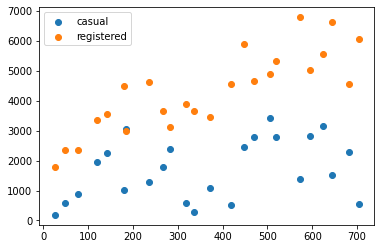

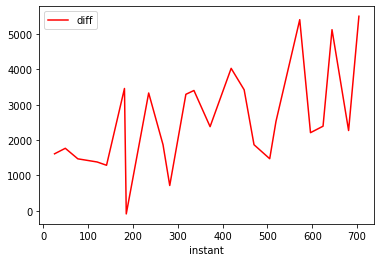

In [25]:
peak=data.loc[data.groupby(["yr", "mnth"])["cnt"].idxmax()]
peak["diff"] = peak["registered"]-peak["casual"] # add new column for diff between registered and casual

plt.scatter(x=peak["instant"], y=peak["casual"], label="casual")
plt.scatter(x=peak["instant"], y=peak["registered"], label="registered")
plt.legend(loc="upper left")

peak.plot(x="instant", y="diff", c="r")

peak